In [42]:
%matplotlib inline

In [43]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# 1. Import data

In [44]:
# 1.1. Read data from CSV
in_filepath = 'raw_data.csv'
df=pd.read_csv(in_filepath, parse_dates=['time_stamp'])

In [45]:
# 1.2. Produce a view of the data
print (df)

              time_stamp  Acceleration    Gravity      Lidar       Pixel  \
0    2011-01-01 00:00:00      2.085110  -2.182863 -11.038147  324.267101   
1    2011-01-01 01:00:00      3.601622 -23.826764  -2.159646  307.215709   
2    2011-01-01 02:00:00      0.000572 -15.430991        NaN  298.599769   
3    2011-01-01 03:00:00      1.511663  -2.992342  -1.425814  309.200210   
4    2011-01-01 04:00:00      0.733779  -1.062621 -10.707404  306.767042   
5    2011-01-01 05:00:00      0.461693 -24.530713  -9.487370  312.428531   
6    2011-01-01 06:00:00      0.931301 -14.343769  -7.172068  298.256341   
7    2011-01-01 07:00:00      1.727804 -11.988556  -6.199844  281.686786   
8    2011-01-01 08:00:00      1.983837 -14.155616  -9.349069  305.137263   
9    2011-01-01 09:00:00      2.694084  -8.697078  -2.862449  318.324147   
10   2011-01-01 10:00:00      2.095973 -19.634865  -1.034313  287.889898   
11   2011-01-01 11:00:00      3.426098  -6.729464  -3.706503  277.336064   
12   2011-01

In [46]:
# 1.3. Print column names, shape of data array
print (list(df))

['time_stamp', 'Acceleration', 'Gravity', 'Lidar', 'Pixel', 'Velocity', 'Magnetic', 'Position', 'Orientation', 'Perception', 'Speed', 'Behavior']


In [47]:
print (df.shape)

(10000, 12)


In [48]:
# 1.4. what are the data types?
print (df.dtypes)

time_stamp      datetime64[ns]
Acceleration           float64
Gravity                float64
Lidar                  float64
Pixel                  float64
Velocity               float64
Magnetic               float64
Position               float64
Orientation            float64
Perception             float64
Speed                  float64
Behavior                object
dtype: object


# 2. Clean data 

In [49]:
# 2.1. Remove rows with any missing values
dfc = df.dropna(how='any')
print (dfc)

              time_stamp  Acceleration    Gravity      Lidar       Pixel  \
0    2011-01-01 00:00:00      2.085110  -2.182863 -11.038147  324.267101   
1    2011-01-01 01:00:00      3.601622 -23.826764  -2.159646  307.215709   
3    2011-01-01 03:00:00      1.511663  -2.992342  -1.425814  309.200210   
5    2011-01-01 05:00:00      0.461693 -24.530713  -9.487370  312.428531   
7    2011-01-01 07:00:00      1.727804 -11.988556  -6.199844  281.686786   
8    2011-01-01 08:00:00      1.983837 -14.155616  -9.349069  305.137263   
9    2011-01-01 09:00:00      2.694084  -8.697078  -2.862449  318.324147   
10   2011-01-01 10:00:00      2.095973 -19.634865  -1.034313  287.889898   
11   2011-01-01 11:00:00      3.426098  -6.729464  -3.706503  277.336064   
12   2011-01-01 12:00:00      1.022261  -1.973073  -4.600312  308.302979   
13   2011-01-01 13:00:00      4.390587 -22.406860  -3.485042  298.878302   
15   2011-01-01 15:00:00      3.352338 -31.514386  -5.090186  301.395668   
16   2011-01

In [50]:
print (dfc.shape)

(7336, 12)


In [51]:
# 2.2. Convert string dates to DateTime
pd.to_datetime(df['time_stamp'])

0      2011-01-01 00:00:00
1      2011-01-01 01:00:00
2      2011-01-01 02:00:00
3      2011-01-01 03:00:00
4      2011-01-01 04:00:00
5      2011-01-01 05:00:00
6      2011-01-01 06:00:00
7      2011-01-01 07:00:00
8      2011-01-01 08:00:00
9      2011-01-01 09:00:00
10     2011-01-01 10:00:00
11     2011-01-01 11:00:00
12     2011-01-01 12:00:00
13     2011-01-01 13:00:00
14     2011-01-01 14:00:00
15     2011-01-01 15:00:00
16     2011-01-01 16:00:00
17     2011-01-01 17:00:00
18     2011-01-01 18:00:00
19     2011-01-01 19:00:00
20     2011-01-01 20:00:00
21     2011-01-01 21:00:00
22     2011-01-01 22:00:00
23     2011-01-01 23:00:00
24     2011-01-02 00:00:00
25     2011-01-02 01:00:00
26     2011-01-02 02:00:00
27     2011-01-02 03:00:00
28     2011-01-02 04:00:00
29     2011-01-02 05:00:00
               ...        
9970   2012-02-20 10:00:00
9971   2012-02-20 11:00:00
9972   2012-02-20 12:00:00
9973   2012-02-20 13:00:00
9974   2012-02-20 14:00:00
9975   2012-02-20 15:00:00
9

# 3. Summarize data

In [52]:
# 3.1. Find min, max, mean, median, standard deviation of all columns (one command)
print("---min---\n", dfc.min(), "\n","---max---\n", dfc.max(), "\n", "---mean---\n", dfc.mean(), "\n", "---median---\n", dfc.median(), "\n", "---std:---\n", dfc.std(), "\n")

---min---
 time_stamp      2011-01-01 00:00:00
Acceleration            0.000484753
Gravity                    -34.6693
Lidar                      -11.3091
Pixel                       267.395
Velocity                    -521.27
Magnetic                    -113.86
Position                   -1.49978
Orientation               0.0106714
Perception                 -333.129
Speed                       299.476
Behavior                        run
dtype: object 
 ---max---
 time_stamp      2012-02-21 15:00:00
Acceleration                4.99877
Gravity                 -0.00240339
Lidar                  -0.000681471
Pixel                       358.118
Velocity                    214.136
Magnetic                    100.179
Position                    1.49959
Orientation                 63.4506
Perception                  333.228
Speed                        302.02
Behavior                       walk
dtype: object 
 ---mean---
 Acceleration      2.507604
Gravity         -17.287486
Lidar           

In [53]:
# or
print (dfc.describe())

       Acceleration      Gravity        Lidar        Pixel     Velocity  \
count   7336.000000  7336.000000  7336.000000  7336.000000  7336.000000   
mean       2.507604   -17.287486    -5.684708   304.398356  -110.128643   
std        1.433707     9.969254     3.303018    12.494462   148.559021   
min        0.000485   -34.669340   -11.309057   267.395477  -521.270372   
25%        1.258263   -25.782853    -8.582718   295.550979  -241.528112   
50%        2.533781   -17.222832    -5.692114   303.099758   -79.619119   
75%        3.744738    -8.633108    -2.785151   311.311602    21.814439   
max        4.998769    -0.002403    -0.000681   358.118268   214.135950   

          Magnetic     Position  Orientation   Perception        Speed  
count  7336.000000  7336.000000  7336.000000  7336.000000  7336.000000  
mean      0.349297    -0.015632    31.369014     1.697129   300.756285  
std      28.039744     0.871108    18.460007    93.591761     0.475217  
min    -113.860012    -1.499783 

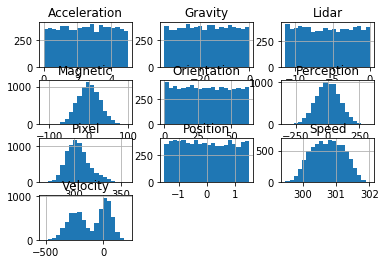

In [54]:
# 3.2 Draw histograms of all columns
df_plot = dfc.hist(bins=20)
plt.show()

# 4. Groupby and resample operations 

In [55]:
# 4.1 find max value of col Velocity within each group in column Behavior
dfc_v_b = dfc[['Velocity', 'Behavior']]
dfc_v = dfc_v_b.groupby('Behavior')
dfc_v_max = dfc_v.max()
print (dfc_v_max)

            Velocity
Behavior            
run       197.816182
wait      172.703722
walk      214.135950


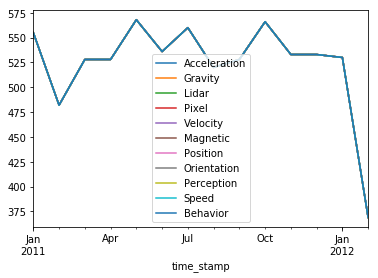

In [56]:
# 4.2 Plot the number of entries over time using 1 month bins.
dfc_patterns = dfc.set_index('time_stamp')
dfc_plot = dfc_patterns.resample('M').count().plot()

In [57]:
# 4.3. Find the pair of columns exhibiting the strongest linear correlation, plot
corr_matrix = dfc.corr().abs()
os = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack().sort_values(ascending=False))
print (os[:5])


Acceleration  Speed          0.907298
Pixel         Position       0.582790
Lidar         Speed          0.029943
Acceleration  Lidar          0.025042
Lidar         Orientation    0.022521
dtype: float64


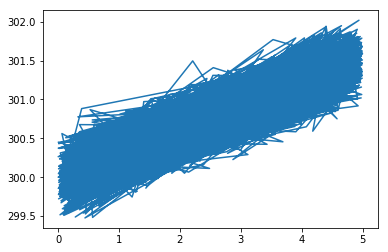

In [58]:
plt.plot(dfc['Acceleration'], dfc['Speed'])

# 5. Export data 

In [59]:
# 5.1 Write processed data to CSV
out_filepath = './processed_data.csv'
dfc.to_csv(out_filepath)